# Housing Prices

## Importaing all libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px




%matplotlib inline 



## Reading the data 

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [3]:
Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
Realestate.shape

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_25189/2318822397.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)


(22213, 90)

In [4]:
housing.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      3   2010      WD          Normal  
2       0      2   2009      WD          Normal  
3       0     11   2007      WD          Normal  
4       0      5   2009      WD          Normal  
5       0     11   2009      WD          Normal  

[5 rows x 81 columns]

In [5]:
housing.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2118.000000   
mean   7.148300e+08  1486.039922  178059.623256    57.691860    68.516053   
std    1.886626e+08   488.650181   75031.089374    42.802105    22.835831   
min    5.263011e+08   334.000000   12789.000000    20.000000    21.000000   
25%    5.313630e+08  1112.000000  129975.000000    20.000000    57.000000   
50%    5.354546e+08  1436.000000  159900.000000    50.000000    68.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    80.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

       ...   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  ...  2579.000000  2580.000000  2580.000000    2580.000000  2580.000000   
mean   ...   466.842575    95.919767    46.085271      23.214341     2.511240   
std    ...   207.476842   129.052016    66.060664      64.107825    25.293935   
min    ...     0.000000     0.000000     0.000000       0.000000     0.000000   
25%    ...   318.000000     0.000000     0.000000       0.000000     0.000000   
50%    ...   474.000000     0.000000    25.500000       0.000000     0.000000   
75%    ...   576.000000   168.000000    68.000000       0.000000     0.000000   
max    ...  1488.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2580.000000  2580.000000   2580.000000  2580.000000  2580.000000  
mean     16.200388     1.662016     48.731395     6.150775  2007.838372  
std      56.824783    30.339396    498.725058     2.670647     1.312333  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  15500.000000    12.000000  2010.000000  

[8 rows x 38 columns]

In [6]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [8]:
# Getting the numerical features out of the dataset

print(f"The total number of numerical features is :",  {len(housing.select_dtypes(exclude='object').columns)},"\n" ,
      housing.select_dtypes(exclude='object').columns)


The total number of numerical features is : {38} 
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


## Cleaning and Tuning the dataset

In [9]:
# dropping ID column

housing.drop(columns=['PID'], inplace=True)

In [10]:
# missing Values

# show only the count of columns with null values

columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 27


PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [11]:
# check correlation of missing values columns to price


corr_col = list(columns_NA.index)
corr_col.append('SalePrice')
housing[corr_col].corr()




LotFrontage  GarageYrBlt  MasVnrArea  BsmtHalfBath  \
LotFrontage      1.000000     0.051578    0.202139     -0.028832   
GarageYrBlt      0.051578     1.000000    0.246120     -0.053576   
MasVnrArea       0.202139     0.246120    1.000000      0.002436   
BsmtHalfBath    -0.028832    -0.053576    0.002436      1.000000   
BsmtFullBath     0.106641     0.174757    0.129113     -0.164064   
TotalBsmtSF      0.307885     0.339679    0.361515      0.000899   
BsmtUnfSF        0.104167     0.133690    0.080283     -0.108801   
GarageCars       0.302285     0.581007    0.348303     -0.029313   
GarageArea       0.337158     0.554057    0.348993     -0.018288   
BsmtFinSF2       0.055247    -0.046385   -0.009519      0.101400   
BsmtFinSF1       0.177304     0.214492    0.277336      0.067414   
SalePrice        0.358577     0.520763    0.500964     -0.033802   

              BsmtFullBath  TotalBsmtSF  BsmtUnfSF  GarageCars  GarageArea  \
LotFrontage       0.106641     0.307885   0.104167    0.302285    0.337158   
GarageYrBlt       0.174757     0.339679   0.133690    0.581007    0.554057   
MasVnrArea        0.129113     0.361515   0.080283    0.348303    0.348993   
BsmtHalfBath     -0.164064     0.000899  -0.108801   -0.029313   -0.018288   
BsmtFullBath      1.000000     0.330192  -0.383609    0.161022    0.183992   
TotalBsmtSF       0.330192     1.000000   0.421573    0.435333    0.465177   
BsmtUnfSF        -0.383609     0.421573   1.000000    0.166081    0.149994   
GarageCars        0.161022     0.435333   0.166081    1.000000    0.889603   
GarageArea        0.183992     0.465177   0.149994    0.889603    1.000000   
BsmtFinSF2        0.169453     0.110119  -0.242334   -0.004548    0.016331   
BsmtFinSF1        0.632603     0.512642  -0.480927    0.261766    0.298309   
SalePrice         0.291080     0.652222   0.167519    0.638801    0.634992   

              BsmtFinSF2  BsmtFinSF1  SalePrice  
LotFrontage     0.055247    0.177304   0.358577  
GarageYrBlt    -0.046385    0.214492   0.520763  
MasVnrArea     -0.009519    0.277336   0.500964  
BsmtHalfBath    0.101400    0.067414  -0.033802  
BsmtFullBath    0.169453    0.632603   0.291080  
TotalBsmtSF     0.110119    0.512642   0.652222  
BsmtUnfSF      -0.242334   -0.480927   0.167519  
GarageCars     -0.004548    0.261766   0.638801  
GarageArea      0.016331    0.298309   0.634992  
BsmtFinSF2      1.000000   -0.058911   0.022520  
BsmtFinSF1     -0.058911    1.000000   0.460792  
SalePrice       0.022520    0.460792   1.000000

In [12]:
# Delete Columns with Negative Correlations

#housing.drop(columns=['BsmtHalfBath'], inplace=True)



# Delete top 5 columns with missing values

#housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], inplace=True)

# Remove Columns with small correlation

#housing.drop(columns=['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','LotFrontage','GarageYrBlt'], inplace=True)

In [13]:
# Fill the rest of Null. Columns with best fill based on Discription File



housing['MasVnrType'].fillna('None', inplace=True)


for i in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1'
         ,'PoolQC','MiscFeature', 'Alley', 'Fence']:
    housing[i].fillna('NA', inplace=True)

# Replacing small number of null value with most common value in column

housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].value_counts().idxmax(), inplace=True)
housing['GarageCars'].fillna(housing['GarageCars'].value_counts().idxmax(), inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].value_counts().idxmax(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].value_counts().idxmax(), inplace=True)
housing['BsmtUnfSF'].fillna(housing['BsmtUnfSF'].value_counts().idxmax(), inplace=True)
housing['BsmtFinSF2'].fillna(housing['BsmtFinSF2'].value_counts().idxmax(), inplace=True)
housing['BsmtFinSF1'].fillna(housing['BsmtFinSF1'].value_counts().idxmax(), inplace=True)
housing['BsmtFullBath'].fillna(housing['BsmtFullBath'].value_counts().idxmax(), inplace=True)
housing['BsmtHalfBath'].fillna(housing['BsmtHalfBath'].value_counts().idxmax(), inplace=True)

# From the Data description File we see the following columns has the same values.
# Columns FireplaceQu ,BsmtQual,ExterQual ,ExterCond ,HeatingQC,BsmtCond ,GarageQual ,KitchenQual , GarageCond 
# they have the same values to decribe them :

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage


# so we replace the cahr values with numerical and NA with 0



housing['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['FireplaceQu'].fillna(0, inplace=True)

housing['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtQual'].fillna(0, inplace=True)

housing['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterQual'].fillna(0, inplace=True)

housing['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterCond'].fillna(0, inplace=True)

housing['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['HeatingQC'].fillna(0, inplace=True)

housing['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtCond'].fillna(0, inplace=True)

housing['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageQual'].fillna(0, inplace=True)

housing['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['KitchenQual'].fillna(0, inplace=True)

housing['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageCond'].fillna(0, inplace=True)


# Fill With mean values

housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)

# fill garage year built with house year built

housing['GarageYrBlt'].fillna(housing['YearBuilt'].mean(), inplace=True)


In [14]:
columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 0


Series([], dtype: int64)

In [15]:
print("New Data set shape is : ",housing.shape)
print("\n\n")


housing.info()




New Data set shape is :  (2580, 80)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2580 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          2580 non-null   object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle    

In [16]:
# Save new cleaned data

housing.to_csv('Housing_cleaned.csv')

In [17]:
housing.duplicated().sum()

1

In [18]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicateRows = housing[housing.duplicated()]
 
# Print the resultant Dataframe
duplicateRows

GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street  \
1       1717     194000          50       RL         80.0    12400   Pave   

  Alley LotShape LandContour  ... ScreenPorch PoolArea PoolQC Fence  \
1    NA      Reg         HLS  ...         113        0     NA    NA   

  MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  
1          NA       0      2   2006       WD          Normal  

[1 rows x 80 columns]

In [19]:
housing.drop_duplicates(keep='first')

GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street  \
1          856     126000          30       RL    68.516053     7890   Pave   
2         1049     139500         120       RL    42.000000     4235   Pave   
3         1001     124900          30  C (all)    60.000000     6060   Pave   
4         1039     114000          70       RL    80.000000     8146   Pave   
5         1665     227000          60       RL    70.000000     8400   Pave   
..         ...        ...         ...      ...          ...      ...    ...   
759        952     121000          30       RL    68.516053     8854   Pave   
760       1733     139600          20       RL    68.516053    13680   Pave   
761       2002     145000          90       RH    82.000000     6270   Pave   
762       1842     217500          60       RL    68.516053     8826   Pave   
763       1911     215000          60       RL    80.000000     9554   Pave   

    Alley LotShape LandContour  ... ScreenPorch PoolArea PoolQC Fence  \
1      NA      Reg         Lvl  ...         166        0     NA    NA   
2      NA      Reg         Lvl  ...           0        0     NA    NA   
3      NA      Reg         Lvl  ...           0        0     NA    NA   
4      NA      Reg         Lvl  ...         111        0     NA    NA   
5      NA      Reg         Lvl  ...           0        0     NA    NA   
..    ...      ...         ...  ...         ...      ...    ...   ...   
759    NA      Reg         Lvl  ...          40        0     NA    NA   
760    NA      IR1         Lvl  ...           0        0     NA    NA   
761    NA      Reg         HLS  ...           0        0     NA    NA   
762    NA      Reg         Lvl  ...           0        0     NA    NA   
763    NA      IR1         Lvl  ...           0        0     NA    NA   

    MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  
1            NA       0      3   2010       WD          Normal  
2            NA       0      2   2009       WD          Normal  
3            NA       0     11   2007       WD          Normal  
4            NA       0      5   2009       WD          Normal  
5            NA       0     11   2009       WD          Normal  
..          ...     ...    ...    ...       ...            ...  
759          NA       0      5   2009       WD          Normal  
760          NA       0      6   2009       WD          Normal  
761          NA       0      8   2007       WD          Normal  
762          NA       0      7   2007       WD          Normal  
763          NA       0      9   2006       WD          Normal  

[2579 rows x 80 columns]

In [20]:
# Assign features to X and Y


#[SalesCor[SalesCor.values > 0.5].index]

X = housing.drop(['SalePrice'], axis=1)

Y = housing['SalePrice']

## Visualizing the dataset

House Price is highly correlated with : 


[Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
        'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'BsmtQual',
        'YearBuilt', 'FullBath', 'FireplaceQu', 'GarageYrBlt', 'YearRemodAdd',
        'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1'],
       dtype='object')]

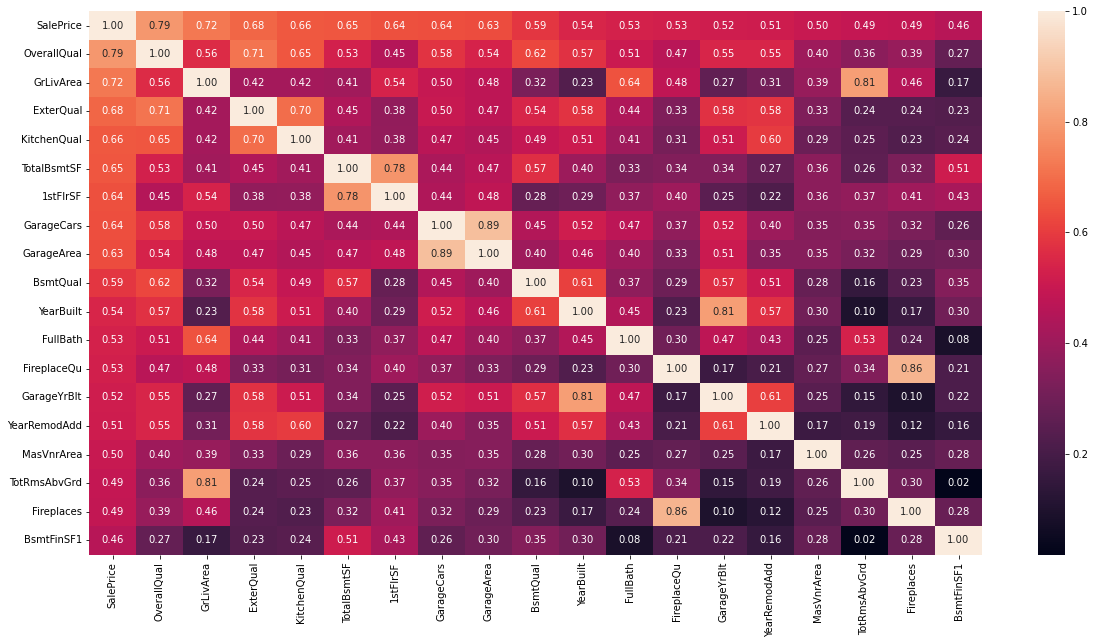

In [21]:
# Features with hight correlation only columns with correlation > 0.5

SalesCor = housing.corr()['SalePrice'].sort_values(ascending= False)

hight_correlation=housing[SalesCor[SalesCor.values > 0.45].index]

corr=hight_correlation.corr()
f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True, fmt = '.2f')

# PRice is gighly correlated with 
print ("House Price is highly correlated with : ")
[SalesCor[SalesCor.values > 0.45].index]

<AxesSubplot:>

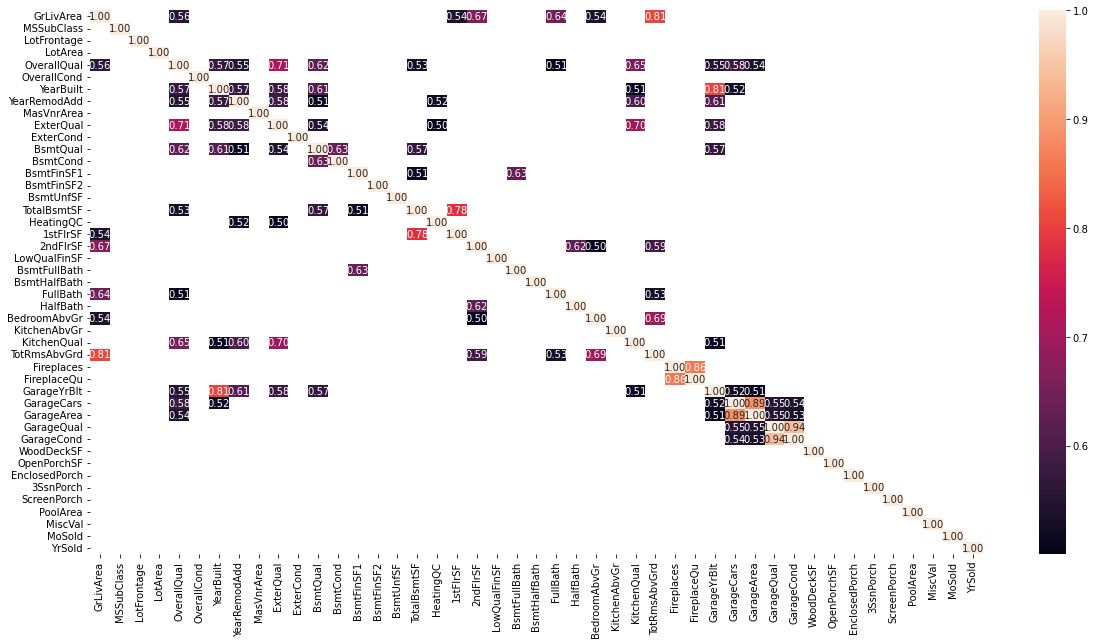

In [22]:
# Features with hight correlation only columns with correlation > 0.5

AllCor = X.corr()

hight_correlation = AllCor[abs(AllCor) >= 0.5]


f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(hight_correlation, annot = True, fmt = '.2f')

# highly correlated columns
# - GarageCars and GarageArea
# - GarageYrBlt and YearBuilt
# - 1stFlrSF and TotalBsmtSF
# - GrLivArea and TotRmsAbvGrd

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Top 10 numerical Correlated columns

estimator = LinearRegression()

rfe = RFE(estimator, n_features_to_select=10, step=1)

selector = rfe.fit(X.fillna(0).select_dtypes(exclude='object'), Y)

selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [24]:

plt.figure(figsize=(15, 10))

fig = px.box(housing, x="OverallQual", y="SalePrice",color = 'OverallQual')
fig.update_layout(
    title="House Price by Overall Quality",
    xaxis_title="Quality",
    yaxis_title="Price ($)",
    legend_title="Legend Title",
    showlegend=False,
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
    )




fig.show()





# most important feature is over all quality , price increases with higher house quality

<Figure size 1080x720 with 0 Axes>

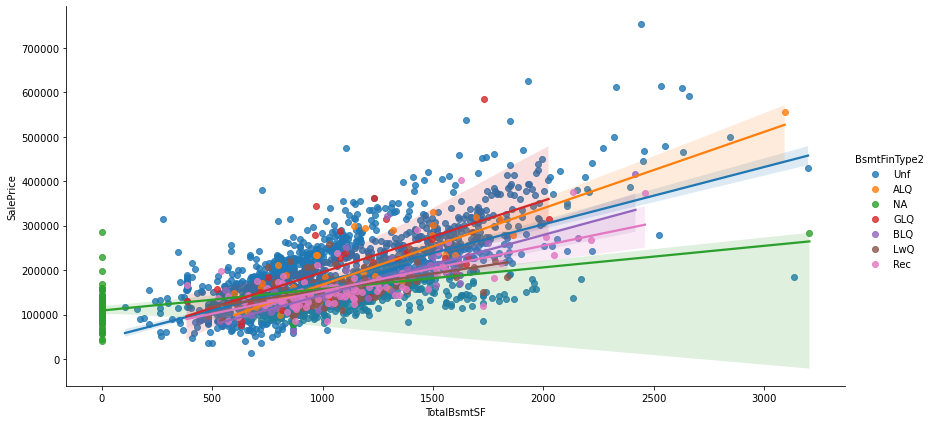

In [25]:
#sales price against Total Basment sliced by BsmtFinType1
sns.lmplot(x='TotalBsmtSF', y='SalePrice', hue='BsmtFinType2',
           data=housing, fit_reg=True,height=6, aspect=2)

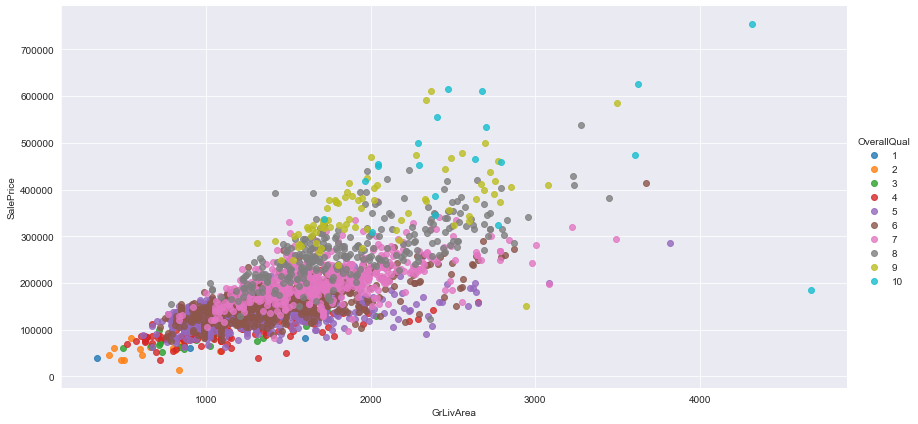

In [26]:
# Ground Living Area


sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.regplot(x="GrLivArea", y="SalePrice",data=housing ,ci=None, scatter_kws={"s": 80}).set(
    xlabel='Ground Living Area (sqft) ', 
    ylabel='Price ($)'
)
title = plt.title('House Price by Ground Living Area ')




#sales price against Living Area sliced by Overall Quality
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual',
           data=housing, fit_reg=False,height=6, aspect=2)



# some outliers when GrlivArea > 4000


In [27]:
#sales price against Year Built sliced by BsmtFinType1
sns.lmplot(x='YearBuilt', y='SalePrice', hue='SaleCondition',
           data=housing, fit_reg=False,height=6, aspect=2)

## ML Prediction

### Linear Regression

In [43]:
# Importing Libraries

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import arange
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time

In [44]:
# since LR is very seneitive to outliers we will remove them :


X.drop(housing[(housing.GrLivArea > 4000)& (housing.SalePrice < 200000)].index, axis=0, inplace=True)
Y.drop(housing[(housing.GrLivArea > 4000)& (housing.SalePrice < 200000)].index, axis=0, inplace=True)

print(X.shape)
print(Y.shape)

KeyError: '[310] not found in axis'

In [30]:
X.corr()


GrLivArea  MSSubClass  LotFrontage   LotArea  OverallQual  \
GrLivArea       1.000000    0.071383     0.306934  0.253745     0.558312   
MSSubClass      0.071383    1.000000    -0.407564 -0.198659     0.057304   
LotFrontage     0.306934   -0.407564     1.000000  0.338844     0.163391   
LotArea         0.253745   -0.198659     0.338844  1.000000     0.076754   
OverallQual     0.558312    0.057304     0.163391  0.076754     1.000000   
OverallCond    -0.105168   -0.076043    -0.048007 -0.032198    -0.095155   
YearBuilt       0.227226    0.054422     0.092485  0.010761     0.574109   
YearRemodAdd    0.305740    0.057283     0.057470  0.008744     0.546102   
MasVnrArea      0.380503    0.018510     0.179934  0.098678     0.399370   
ExterQual       0.413191    0.033548     0.113649  0.040598     0.713134   
ExterCond      -0.006306   -0.067387    -0.013277  0.000188    -0.007164   
BsmtQual        0.321204    0.087070     0.072942  0.041360     0.622224   
BsmtCond        0.070768   -0.001303    -0.009248 -0.001252     0.268495   
BsmtFinSF1      0.156299   -0.073540     0.156703  0.158617     0.270142   
BsmtFinSF2     -0.020261   -0.074055     0.048647  0.083103    -0.029675   
BsmtUnfSF       0.246043   -0.112793     0.093338  0.018897     0.255972   
TotalBsmtSF     0.402477   -0.222523     0.277930  0.216681     0.525416   
HeatingQC       0.276823   -0.008045     0.060113  0.005347     0.441059   
1stFlrSF        0.533117   -0.256917     0.396835  0.308175     0.451198   
2ndFlrSF        0.664668    0.307115     0.002067  0.018430     0.245445   
LowQualFinSF    0.089936    0.013455    -0.009889 -0.000183    -0.044285   
BsmtFullBath    0.040810   -0.001134     0.093035  0.115806     0.172328   
BsmtHalfBath   -0.053266   -0.010459    -0.025610  0.027553    -0.049954   
FullBath        0.643496    0.144870     0.149130  0.120947     0.506703   
HalfBath        0.446417    0.181705     0.022980  0.025141     0.271513   
BedroomAbvGr    0.542264   -0.023791     0.222786  0.140451     0.067324   
KitchenAbvGr    0.131426    0.251363     0.017468 -0.014298    -0.153696   
KitchenQual     0.417351   -0.008514     0.143029  0.060300     0.653572   
TotRmsAbvGrd    0.807962    0.032140     0.308659  0.201084     0.358531   
Fireplaces      0.460265   -0.047513     0.220408  0.245061     0.387671   
FireplaceQu     0.479627   -0.045990     0.219655  0.177905     0.465582   
GarageYrBlt     0.265269    0.099597     0.050441 -0.013923     0.546127   
GarageCars      0.495272   -0.031313     0.279962  0.173983     0.579734   
GarageArea      0.475228   -0.091067     0.313035  0.196984     0.536975   
GarageQual      0.164685   -0.084094     0.112722  0.080731     0.290565   
GarageCond      0.146734   -0.104890     0.103807  0.071053     0.276297   
WoodDeckSF      0.247532   -0.017177     0.106046  0.154947     0.248919   
OpenPorchSF     0.312401   -0.007737     0.125492  0.077900     0.283129   
EnclosedPorch   0.001186   -0.029131     0.003748  0.017974    -0.134221   
3SsnPorch       0.009055   -0.041826     0.030449  0.017926     0.014456   
ScreenPorch     0.099430   -0.055171     0.077098  0.054418     0.049961   
PoolArea        0.058569   -0.013445     0.086264  0.052863    -0.002383   
MiscVal        -0.003709   -0.027251     0.012690  0.040482    -0.025700   
MoSold          0.035006    0.007468     0.000183  0.008266     0.014930   
YrSold         -0.006606   -0.025578    -0.001338 -0.016429     0.006940   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
GrLivArea        -0.105168   0.227226      0.305740    0.380503   0.413191   
MSSubClass       -0.076043   0.054422      0.057283    0.018510   0.033548   
LotFrontage      -0.048007   0.092485      0.057470    0.179934   0.113649   
LotArea          -0.032198   0.010761      0.008744    0.098678   0.040598   
OverallQual      -0.095155   0.574109      0.546102    0.399370   0.713134   
OverallCond       1.000000  -0.396304      0.06702

In [31]:
# Adding New Features

X['TotalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

X['HouseAge'] = X.YrSold - X.YearBuilt

X['IsNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

In [32]:
housing.corr()['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
ExterQual        0.682470
KitchenQual      0.655118
TotalBsmtSF      0.652192
1stFlrSF         0.642613
GarageCars       0.638722
GarageArea       0.634669
BsmtQual         0.587704
YearBuilt        0.544370
FullBath         0.534982
FireplaceQu      0.527212
GarageYrBlt      0.517847
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
HeatingQC        0.435850
LotFrontage      0.338396
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
GarageQual       0.273221
2ndFlrSF         0.263144
GarageCond       0.252923
BsmtCond         0.207367
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
ExterCond        0.011270
YrSold      

In [33]:
# Delete Un-used columns

# we dont need year sold since we creaed house age 

X.drop(columns=['YearBuilt'], inplace=True)

# to avoid Multicolliniearity we drop feautrue of each pari with less correlaion with price :

# - GarageCars and GarageArea
# - GarageYrBlt and YearBuilt
# - 1stFlrSF and TotalBsmtSF
# - GrLivArea and TotRmsAbvGrd

X.drop(columns=['GarageArea','GarageYrBlt','1stFlrSF','TotRmsAbvGrd'], inplace=True)



#transform them into categorical variables





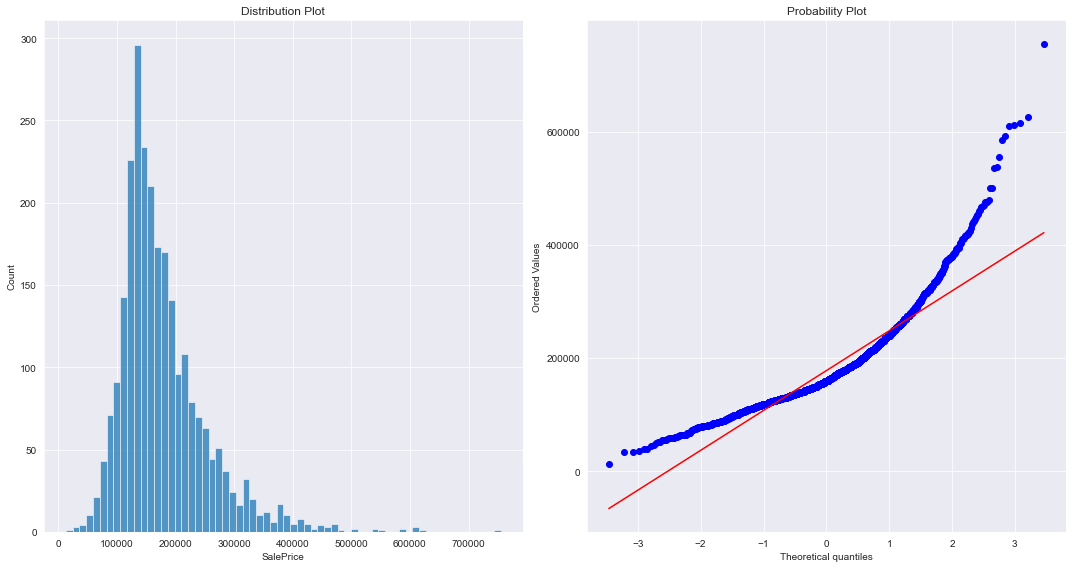

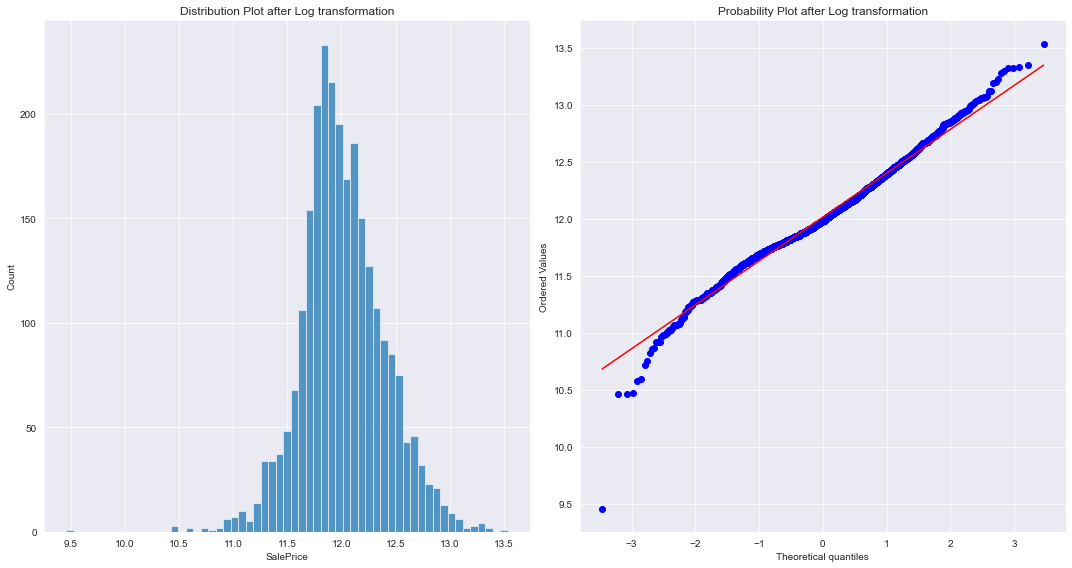

In [34]:
# Check Price Normality


fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(Y, ax=ax[0])
ax[0].set_title('Distribution Plot')

ax[1] = stats.probplot((Y), plot=plt)
plt.tight_layout()


# We see that it is right skewed , we can apply log transformation to it 

Y = np.log(1 + Y)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(Y, ax=ax[0])
ax[0].set_title('Distribution Plot after Log transformation')

ax[1] = stats.probplot((Y), plot=plt)

plt.title('Probability Plot after Log transformation')
plt.tight_layout()






In [35]:
# we now check the normality for all other columns based on the skew ratio 


# Skew Rules S :
    
#     -1 > S OR S > 1 =  highly skewed
    
#     -1 < S < -0.5 OR 0.5 < S < 1 = moderately skewed
    
#     -0.5 < S < 0.5 = symmetric
    

SkewColumns = X.skew().sort_values(ascending=False)
SkewColumns

# pt=PowerTransformer(method='yeo-johnson') 
# X_power=pt.fit_transform(X)
# df=pd.DataFrame(X_power,columns=X.columns)

# Log-transform skewed columns

for c in SkewColumns[abs(SkewColumns) > 0.75].index:
    X[c] = np.log(1 + X[c])
    
# SkewColumns   

SkewColumns

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_25189/1915323876.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



MiscVal          21.276892
PoolArea         19.885052
LowQualFinSF     13.252659
LotArea          13.155829
3SsnPorch        11.823251
IsNew             7.842982
KitchenAbvGr      4.528240
EnclosedPorch     4.055885
BsmtFinSF2        3.989598
ScreenPorch       3.987907
BsmtHalfBath      3.789943
MasVnrArea        2.679491
OpenPorchSF       2.592008
WoodDeckSF        1.849780
ExterCond         1.391696
MSSubClass        1.348732
LotFrontage       1.290824
BsmtUnfSF         0.963175
GrLivArea         0.901816
2ndFlrSF          0.819780
ExterQual         0.804010
BsmtFinSF1        0.787584
Fireplaces        0.735936
TotalSqFeet       0.729115
HalfBath          0.669950
OverallCond       0.623815
HouseAge          0.600741
BsmtFullBath      0.530354
TotalBsmtSF       0.479602
KitchenQual       0.412037
BedroomAbvGr      0.254948
MoSold            0.233419
FullBath          0.204292
OverallQual       0.180900
FireplaceQu       0.162013
YrSold            0.091829
GarageCars       -0.192650
Y

In [36]:
 X.skew().sort_values(ascending=False)

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_25189/2131267606.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



PoolArea         17.012515
3SsnPorch         9.194264
LowQualFinSF      8.882448
IsNew             7.842982
MiscVal           5.067488
KitchenAbvGr      3.849522
BsmtHalfBath      3.697771
ScreenPorch       2.947278
BsmtFinSF2        2.326222
EnclosedPorch     1.945942
Fireplaces        0.735936
TotalSqFeet       0.729115
HalfBath          0.669950
OverallCond       0.623815
HouseAge          0.600741
MasVnrArea        0.556366
BsmtFullBath      0.530354
ExterQual         0.521132
TotalBsmtSF       0.479602
KitchenQual       0.412037
ExterCond         0.359218
2ndFlrSF          0.289177
BedroomAbvGr      0.254948
MoSold            0.233419
MSSubClass        0.232009
FullBath          0.204292
OverallQual       0.180900
FireplaceQu       0.162013
WoodDeckSF        0.144225
YrSold            0.091829
OpenPorchSF      -0.013551
GrLivArea        -0.072891
GarageCars       -0.192650
YearRemodAdd     -0.437078
HeatingQC        -0.510900
LotArea          -0.511912
BsmtFinSF1       -0.707040
L

In [37]:
X = X[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
        'TotalBsmtSF', 'GarageCars', 'BsmtQual', 'FullBath', 'FireplaceQu', 'YearRemodAdd',
        'MasVnrArea', 'Fireplaces', 'BsmtFinSF1','HouseAge'
       ,'TotalSqFeet']]
X

OverallQual  GrLivArea  ExterQual  KitchenQual  TotalBsmtSF  GarageCars  \
1              6   6.753438   1.386294            3        856.0         2.0   
2              5   6.956545   1.609438            4       1049.0         1.0   
3              5   6.909753   1.609438            4        837.0         1.0   
4              4   6.946976   1.609438            3        405.0         1.0   
5              8   7.418181   1.609438            4        810.0         2.0   
..           ...        ...        ...          ...          ...         ...   
759            6   6.859615   1.386294            2        952.0         1.0   
760            3   7.458186   1.386294            3          0.0         2.0   
761            5   7.602401   1.386294            3       1001.0         3.0   
762            7   7.519150   1.609438            4        985.0         2.0   
763            8   7.555905   1.609438            4        777.0         2.0   

     BsmtQual  FullBath  FireplaceQu  YearRemodAdd  MasVnrArea  Fireplaces  \
1    1.386294         1          4.0          1950    0.000000           1   
2    1.609438         2          0.0          1984    5.010635           0   
3    1.386294         1          0.0          2007    0.000000           0   
4    1.098612         1          0.0          2003    0.000000           0   
5    1.609438         2          0.0          2001    0.000000           0   
..        ...       ...          ...           ...         ...         ...   
759  1.386294         1          4.0          1950    0.000000           1   
760  0.000000         2          4.0          1955    0.000000           1   
761  1.386294         2          0.0          1950    0.000000           0   
762  1.609438         2          3.0          2000    4.976734           1   
763  1.609438         2          3.0          1994    4.836282           1   

     BsmtFinSF1  HouseAge  TotalSqFeet  
1      5.476464        71       1712.0  
2      6.315358        25       2098.0  
3      6.603944        77       1838.0  
4      0.000000       109       1444.0  
5      6.467699         8       2475.0  
..          ...       ...          ...  
759    0.000000        93       1904.0  
760    0.000000        54       1733.0  
761    5.652489        58       3003.0  
762    6.735780         7       2827.0  
763    5.942799        13       2688.0  

[2577 rows x 15 columns]

In [38]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X


X.shape: (2577, 15)


OverallQual  GrLivArea  ExterQual  KitchenQual  TotalBsmtSF  GarageCars  \
1              6   6.753438   1.386294            3        856.0         2.0   
2              5   6.956545   1.609438            4       1049.0         1.0   
3              5   6.909753   1.609438            4        837.0         1.0   
4              4   6.946976   1.609438            3        405.0         1.0   
5              8   7.418181   1.609438            4        810.0         2.0   
..           ...        ...        ...          ...          ...         ...   
759            6   6.859615   1.386294            2        952.0         1.0   
760            3   7.458186   1.386294            3          0.0         2.0   
761            5   7.602401   1.386294            3       1001.0         3.0   
762            7   7.519150   1.609438            4        985.0         2.0   
763            8   7.555905   1.609438            4        777.0         2.0   

     BsmtQual  FullBath  FireplaceQu  YearRemodAdd  MasVnrArea  Fireplaces  \
1    1.386294         1          4.0          1950    0.000000           1   
2    1.609438         2          0.0          1984    5.010635           0   
3    1.386294         1          0.0          2007    0.000000           0   
4    1.098612         1          0.0          2003    0.000000           0   
5    1.609438         2          0.0          2001    0.000000           0   
..        ...       ...          ...           ...         ...         ...   
759  1.386294         1          4.0          1950    0.000000           1   
760  0.000000         2          4.0          1955    0.000000           1   
761  1.386294         2          0.0          1950    0.000000           0   
762  1.609438         2          3.0          2000    4.976734           1   
763  1.609438         2          3.0          1994    4.836282           1   

     BsmtFinSF1  HouseAge  TotalSqFeet  
1      5.476464        71       1712.0  
2      6.315358        25       2098.0  
3      6.603944        77       1838.0  
4      0.000000       109       1444.0  
5      6.467699         8       2475.0  
..          ...       ...          ...  
759    0.000000        93       1904.0  
760    0.000000        54       1733.0  
761    5.652489        58       3003.0  
762    6.735780         7       2827.0  
763    5.942799        13       2688.0  

[2577 rows x 15 columns]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size=0.20, random_state=42)

In [40]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [46]:

def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for {model} is {round(cross_val_score(model, X_train, y_train).mean(),4)}')
    print(f'The training score is {round(model.score(X_train, y_train), 4)}')
    print(f'The testing score is {round(model.score(X_test, y_test),4)}')
    print(f'The number of features is : {np.sum(model.coef_ != 0)}')




In [47]:
# Linear Regression


ln = LinearRegression()
ln.fit(X_train, y_train)


display_R2_scores(ln, X_train, y_train, X_test, y_test)

print("Training RMSE(LR): " + str(np.sqrt(mean_squared_error(y_train, ln.predict(X_train)))))
print("Testing RMSE(LR): " + str(np.sqrt(mean_squared_error(y_test,ln.predict(X_test)))))




The mean cross validation score for LinearRegression() is 0.879
The training score is 0.8803
The testing score is 0.8812
The number of features is : 15
Training RMSE(LR): 0.1343874188352283
Testing RMSE(LR): 0.13181612166246895


In [48]:
predicted_ln = ln.predict(X_test)
expected= y_test

expected

129    11.856522
934    11.771444
761    12.509878
320    12.188423
343    11.898195
         ...    
604    12.154521
914    12.100718
163    11.350418
26     12.032707
571    11.884496
Name: SalePrice, Length: 516, dtype: float64

In [51]:
# Ridge

ridge = Ridge(alpha = 10222) # To improve my Ridge, I manually adjusted the alpha score; the Ridge CV returned smaller alphas (even if the upper limit was increased) 
ridge = ridge.fit(X_train, y_train)


display_R2_scores(ridge, X_train, y_train, X_test, y_test)


The mean cross validation score for Ridge(alpha=10222) is 0.8297
The training score is 0.8332
The testing score is 0.8413
The number of features is : 15


In [52]:

las = Lasso()
grid_values = {'alpha': [0.0001,0.0002,0.00025, 0.0003, 0.00036, 0.00037, 0.000375, 0.00038, 0.00039,0.000395, 0.0004,0.00045,0.00047, 0.0005,0.00051, 0.00052, 0.00055, 0.0006,0.0008,0.001,0.01, 0.02]}
grid_las_mse = GridSearchCV(las, param_grid = grid_values, scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_las_mse.fit(X_train, y_train)
print('Grid best parameter (min. mse): ', grid_las_mse.best_params_)

Grid best parameter (min. mse):  {'alpha': 0.0001}


In [53]:
# Lsso

lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train, y_train);


display_R2_scores(lasso, X_train, y_train, X_test, y_test)


The mean cross validation score for Lasso(alpha=0.0001) is 0.879
The training score is 0.8803
The testing score is 0.881
The number of features is : 15


In [54]:
# We Say that Lasso is most succesful model


lasso_predict = lasso.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=lasso_predict, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)


Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

Text(0.5, 1.0, 'Residuals')

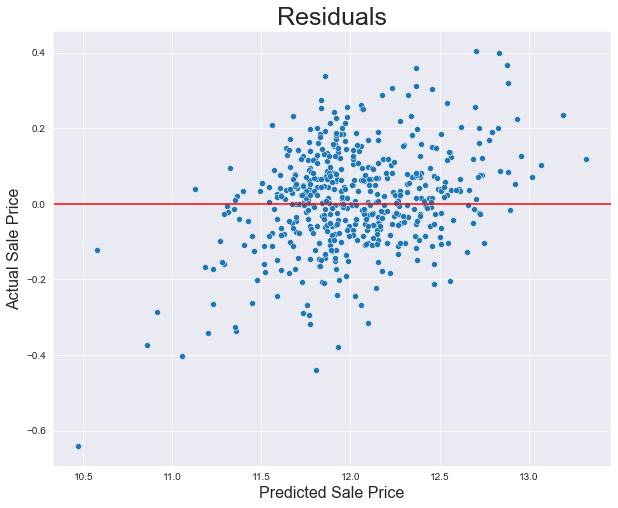

In [59]:

plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=housing, x=y_test, y=y_test-lasso_predict)
ax.axhline(y=0, c='red')
plt.xlabel('Predicted Sale Price', fontsize=16)
plt.ylabel('Actual Sale Price', fontsize=16)
plt.title('Residuals', fontsize=25)